In [30]:
#https://blogs.oracle.com/meena/simple-neural-network-model-using-keras-and-grid-search-hyperparameterstuning
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


In [6]:
seed = 7
np.random.seed(seed)
X= np.load("/home/rpezoa/experiment_data/big_2+/features/2+_1_rpr.npy")
y= np.load("/home/rpezoa/experiment_data/big_2+/labels/2+_1.npy")

In [14]:
def create_model():
    activation="relu"
    init_mode = "uniform"
    model = Sequential()
    model.add(Dense(units = 8,  kernel_initializer="uniform", activation="relu", input_dim=40))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [15]:
model = KerasClassifier(build_fn=create_model, batch_size=1000, epochs=10)

In [17]:
epochs = [1,10]
batch_size = [1000,5000]
param_grid = dict(epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X[0:1000,0:],y[0:1000])

Epoch 1/1
800/800 [==============================] - 0s 3us/step
Epoch 1/1
800/800 [==============================] - 0s 2us/step
Epoch 1/1
800/800 [==============================] - 0s 2us/step
Epoch 1/1
800/800 [==============================] - 0s 3us/step
Epoch 1/1
800/800 [==============================] - 0s 2us/step
Epoch 1/10
800/800 [==============================] - 1s 1ms/step - loss: 0.6922 - acc: 0.9812
Epoch 2/10
800/800 [==============================] - 0s 7us/step - loss: 0.6908 - acc: 0.9812
Epoch 3/10
800/800 [==============================] - 0s 7us/step - loss: 0.6895 - acc: 0.9812
Epoch 4/10
800/800 [==============================] - 0s 4us/step - loss: 0.6880 - acc: 0.9812
Epoch 5/10
800/800 [==============================] - 0s 6us/step - loss: 0.6866 - acc: 0.9812
Epoch 6/10
800/800 [==============================] - 0s 4us/step - loss: 0.6851 - acc: 0.9812
Epoch 7/10
800/800 [==============================] - 0s 7us/step - loss: 0.6836 - acc: 0.9812
Epoch 8/10

Epoch 10/10
800/800 [==============================] - 0s 3us/step
Epoch 1/10
800/800 [==============================] - 1s 2ms/step - loss: 0.6926 - acc: 0.8175
Epoch 2/10
800/800 [==============================] - 0s 4us/step - loss: 0.6908 - acc: 0.9800
Epoch 3/10
800/800 [==============================] - 0s 5us/step - loss: 0.6890 - acc: 0.9800
Epoch 4/10
800/800 [==============================] - 0s 5us/step - loss: 0.6872 - acc: 0.9800
Epoch 5/10
800/800 [==============================] - 0s 5us/step - loss: 0.6855 - acc: 0.9800
Epoch 6/10
800/800 [==============================] - 0s 4us/step - loss: 0.6838 - acc: 0.9800
Epoch 7/10
800/800 [==============================] - 0s 4us/step - loss: 0.6821 - acc: 0.9800
Epoch 8/10
800/800 [==============================] - 0s 6us/step - loss: 0.6804 - acc: 0.9800
Epoch 9/10
800/800 [==============================] - 0s 7us/step - loss: 0.6785 - acc: 0.9800
Epoch 10/10
800/800 [==============================] - 0s 3us/step
Epoch 1/10


In [19]:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
print("Best: %f using %s"% (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r"% (mean,stdev,param))

Best: 0.981000 using {'batch_size': 1000, 'epochs': 10}
0.476000 (0.434251) with: {'batch_size': 1000, 'epochs': 1}
0.981000 (0.005831) with: {'batch_size': 1000, 'epochs': 10}
0.686000 (0.369085) with: {'batch_size': 5000, 'epochs': 1}
0.981000 (0.005831) with: {'batch_size': 5000, 'epochs': 10}


In [26]:
pred=grid_result.best_estimator_.predict(X)

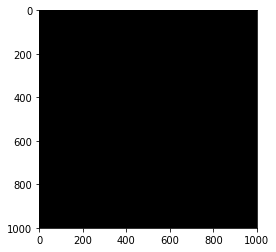

In [28]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(np.reshape(pred,(1000,1000)), cmap="gray")
plt.show()

In [29]:
pred.sum()

0

In [31]:
#https://www.fabienplisson.com/random-forest-and-grid-search/

In [32]:
#https://stackoverflow.com/questions/37678471/i-am-trying-to-implement-gridsearchcv-to-tune-the-parameters-of-k-nearest-neighb?rq=1
k = np.arange(20)+1
parameters = {'n_neighbors': k}


In [33]:
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])